In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
cutles =pd.read_csv("/content/Cutlets.csv")
cutles.head(10)


,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [ ]:
cutles.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [ ]:
cutles.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [ ]:
cutles[cutles.duplicated()].shape

(0, 2)

In [ ]:
cutles[cutles.duplicated()]

,Unit A,Unit B


In [ ]:
cutles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


<ipython-input-24-28d4900b68f3>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


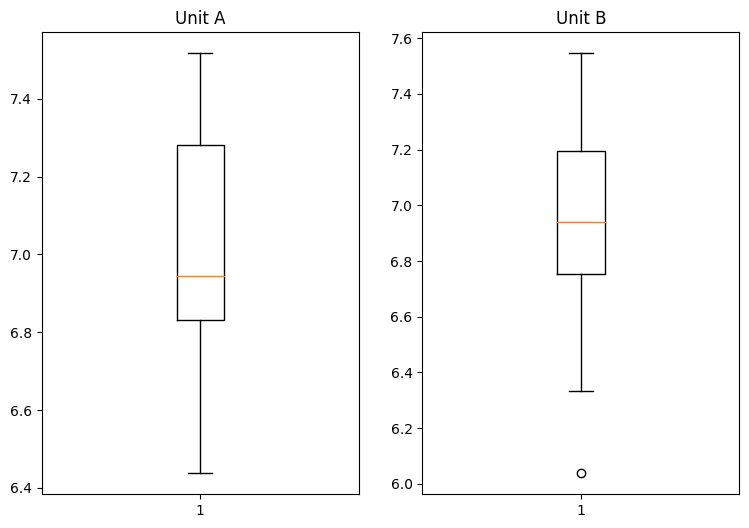

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutles['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutles['Unit B'])
plt.title('Unit B')
plt.show()

<ipython-input-27-8d1ac9b1f591>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


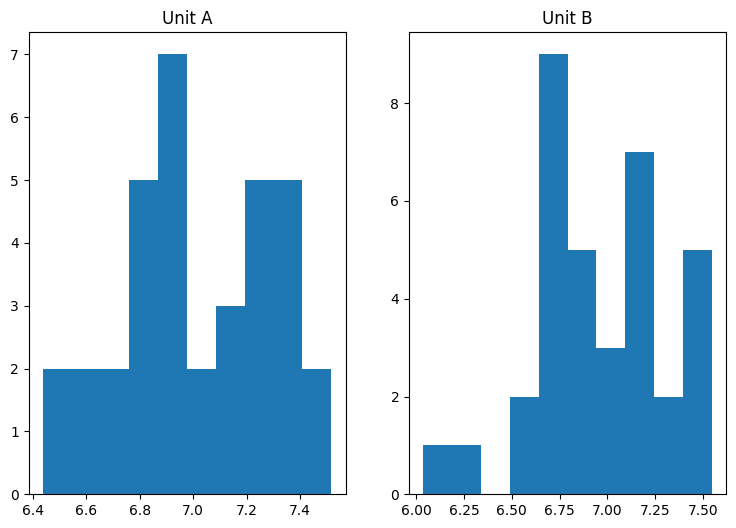

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(cutles['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutles['Unit B'])
plt.title('Unit B')
plt.show()

<ipython-input-30-9c7538d5c940>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cutles['Unit A'], kde = True)
<ipython-input-30-9c7538d5c940>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cutles['Unit B'],hist = True)


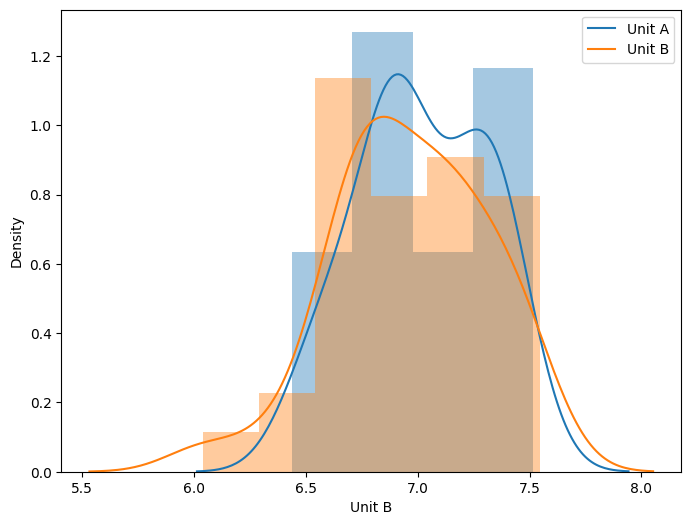

In [ ]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutles['Unit A'], kde = True)
sns.distplot(cutles['Unit B'],hist = True)
plt.legend(labels)

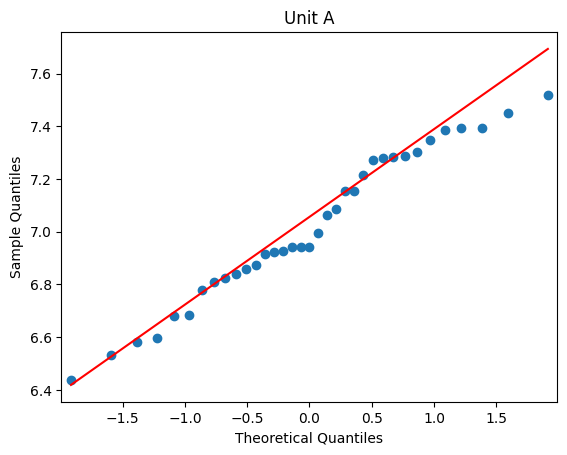

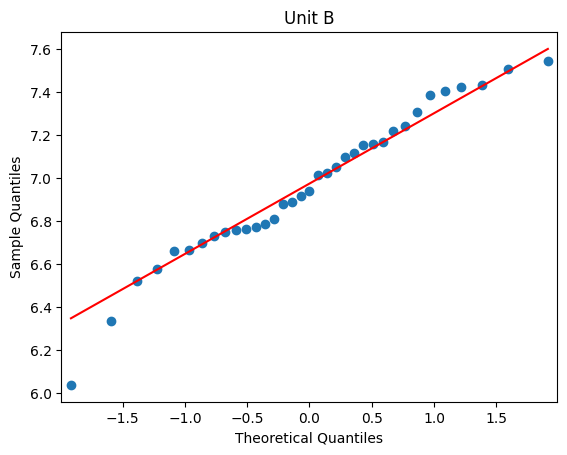

In [ ]:
# To check Normal Distributed or Not

sm.qqplot(cutles['Unit A'],line='q')
plt.title('Unit A')
sm.qqplot(cutles['Unit B'],line='q')
plt.title('Unit B')
plt.show()

In [ ]:
# Compare Evidences with Hypothesis using t-statistics
statistic, p_value=stats.ttest_ind(cutles['Unit A'],cutles['Unit B'],alternative='two-sided')
p_value


0.4722394724599501

In [ ]:
# If p_value is  ≠  ' α  ' we failed to reject Null Hypothesis because of lack of evidence
# If p_value is = ' α  ' we reject Null Hypothesis

alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis
